### IMPORT DES BIBLIOTHEQUES

In [12]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt


### CHARGEMENT DU DATASET 

In [2]:
df = pd.read_csv('X_train_fr_en.csv')

df.head()

productid     imageid  prdtypecode  \
0  3804725264  1263597046           10   
1   436067568  1008141237         2280   
2   201115110   938777978           50   
3    50418756   457047496         1280   
4   278535884  1077757786         2705   

                                             produit langue  
0  Olivia: Personalisiertes Notizbuch / 150 Seite...     de  
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...     fr  
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...     fr  
3  Peluche Donald - Europe - Disneyland 2000 (Mar...     de  
4  La Guerre Des Tuques Luc a des id&eacute;es de...     fr

Nous avons un dataset avec plusieurs langues. Nous décidons de conserver le français et l'anglais qui sont les 2 langues les plus présentes au sein du dataset. Nous souhaitons créer un "Wordcloud" des 10 mots les plus présents par langue

### PREPARATION DU DATASET

In [3]:
# Liste de nos targets
target_list = list(df['prdtypecode'].unique())

# Séparation de notre dataset par langue
df_fr = df.loc[(df['langue'] == 'fr')]

df_en = df.loc[(df['langue'] == 'en')]

In [9]:
df_fr.head()

productid     imageid  prdtypecode  \
1  436067568  1008141237         2280   
2  201115110   938777978           50   
4  278535884  1077757786         2705   
5    5862738   393356830         2280   
7  344240059   999581347         2522   

                                             produit langue  
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...     fr  
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...     fr  
4  La Guerre Des Tuques Luc a des id&eacute;es de...     fr  
5  Afrique Contemporaine N° 212 Hiver 2004 - Doss...     fr  
7  Conquérant Sept Cahier Couverture Polypro 240 ...     fr

### WORDCLOUD

In [15]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def wordcloud(dataset, cible, langue):
    df = dataset.loc[dataset['prdtypecode'] == cible]
    text = ""
    for i in df['produit']:
        text += i
    text_1 = re.findall('[a-zA-Zéà]{5,}', text)
    text_2 = " ".join(i for i in text_1 if len(i) > 2)
    stop_words_en = set(stopwords.words('english'))
    stop_words_fr = set(stopwords.words('french'))
    stop_words_en.add("strong")
    stop_words_fr.add("strong")
    if langue == "french":
        wc = WordCloud(background_color = "black", max_words = 10, stopwords = stop_words_fr, max_font_size = 50)
    else:
        wc = WordCloud(background_color = "black", max_words = 10, stopwords = stop_words_en, max_font_size = 50)
        
    plt.figure()                                       
    wc.generate(text_2)           # "Calcul" du wordcloud
    plt.imshow(wc)
    plt.title("Mots les plus représentés liés aux poduits codés " + str(cible))
    plt.xticks([])
    plt.yticks([])
    plt.show();

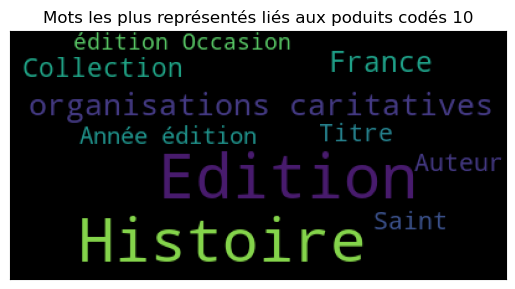

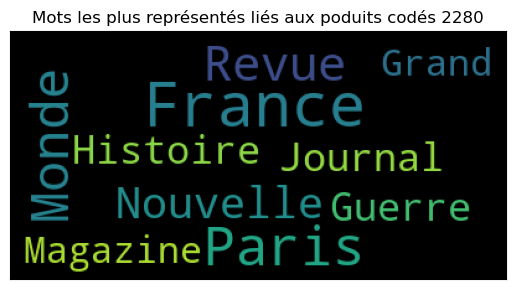

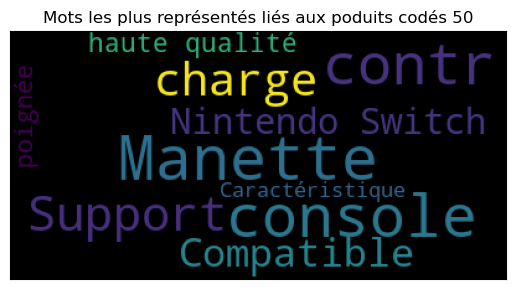

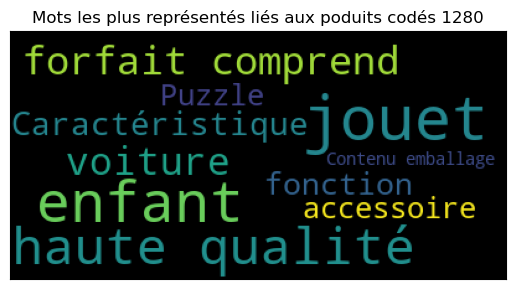

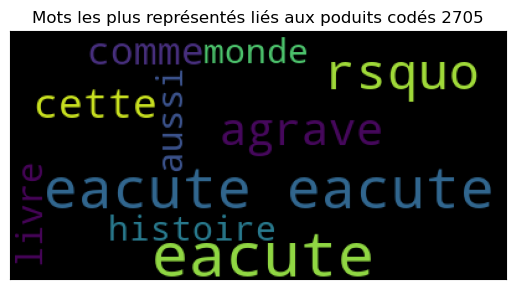

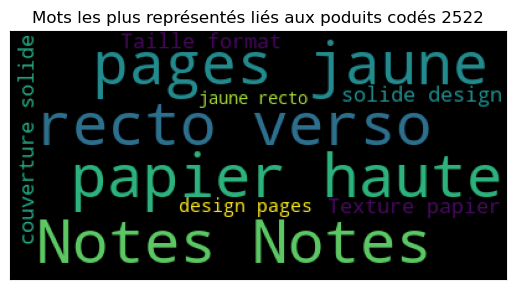

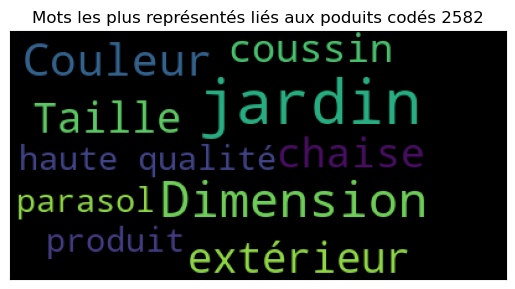

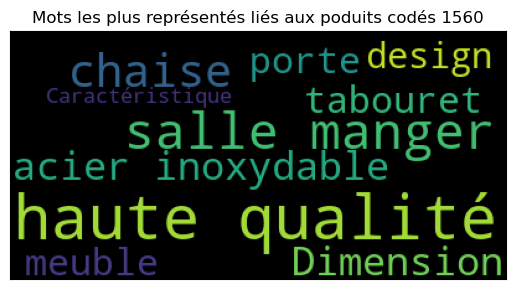

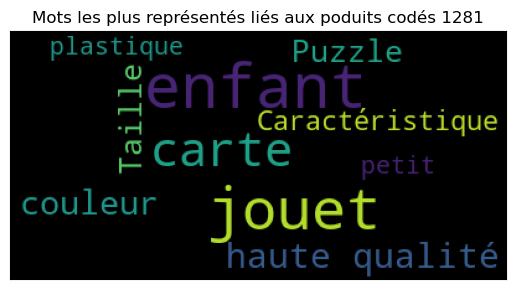

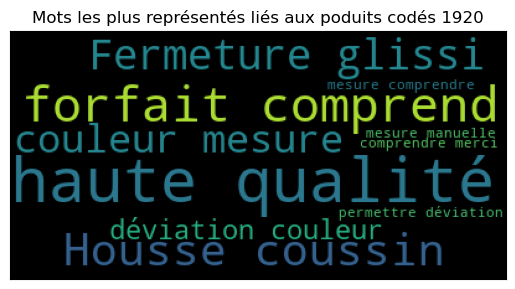

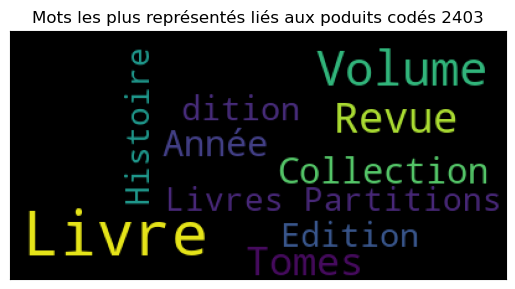

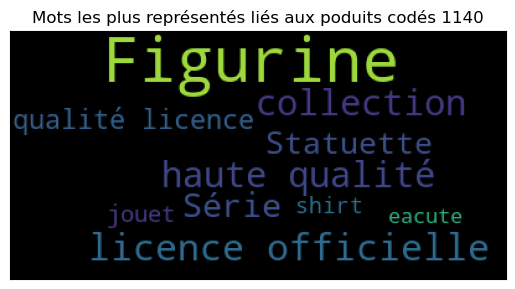

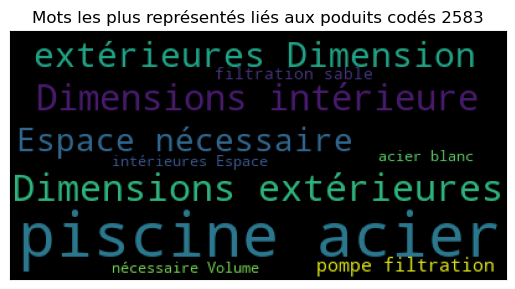

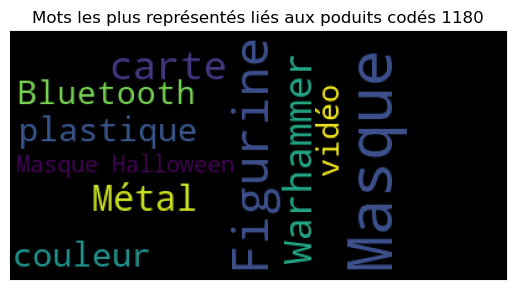

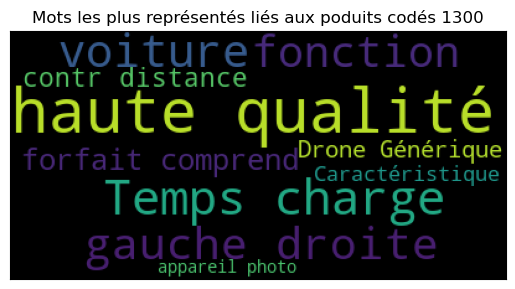

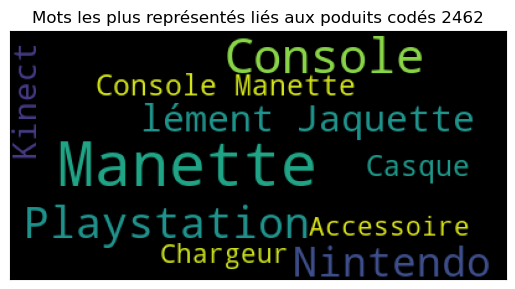

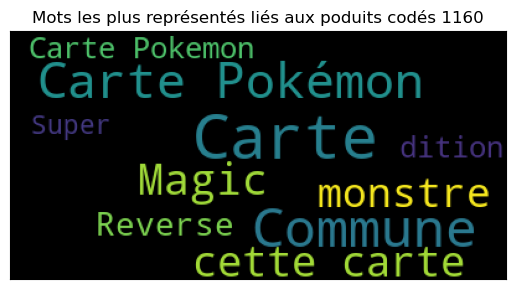

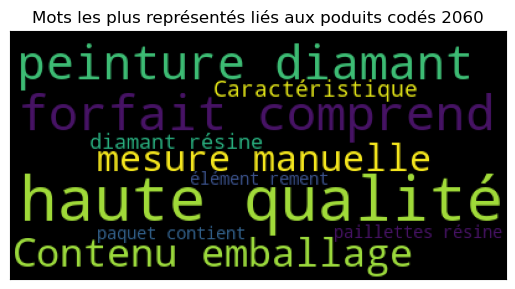

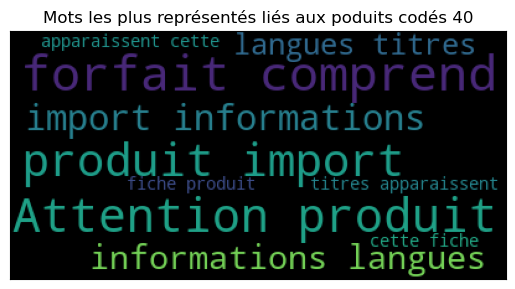

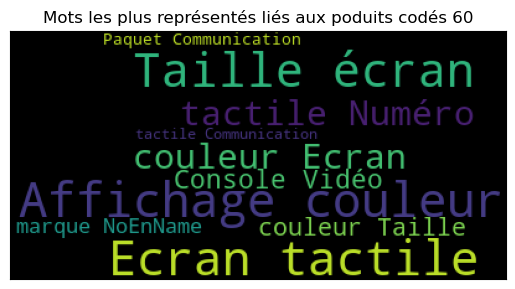

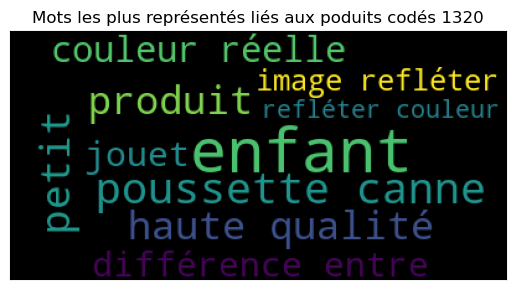

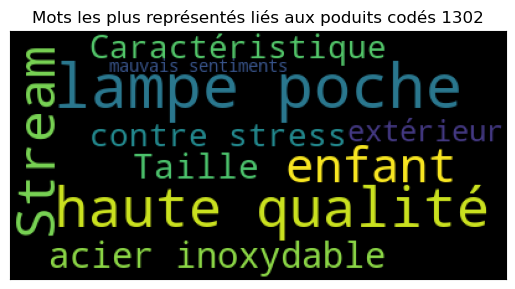

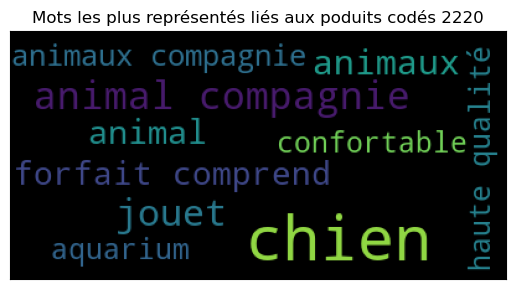

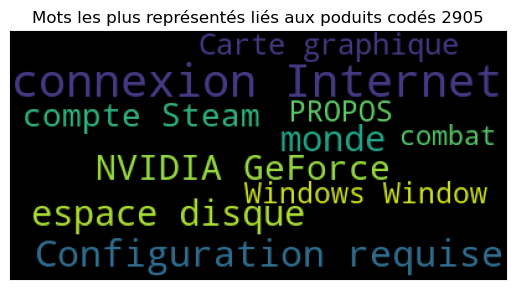

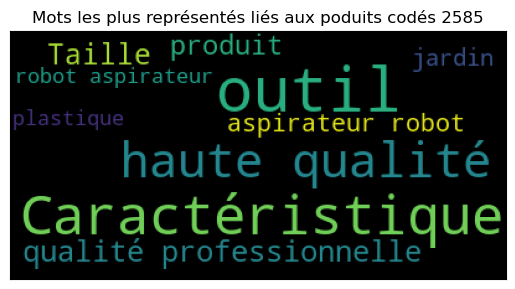

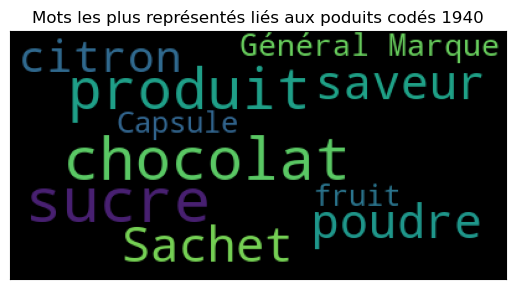

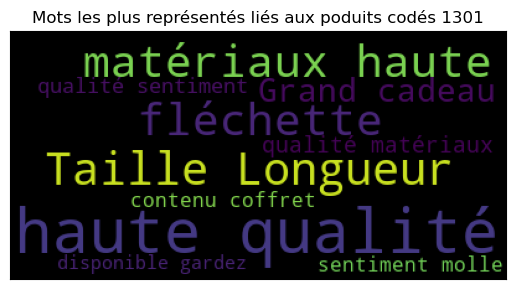

In [16]:
for cible in target_list:
    wordcloud(df_fr, cible, "french")

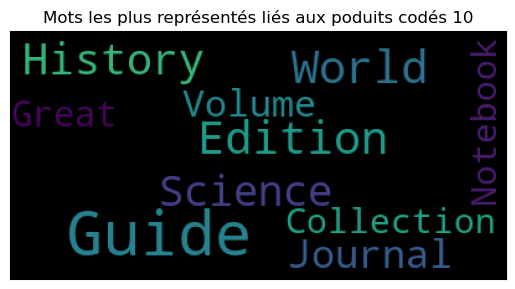

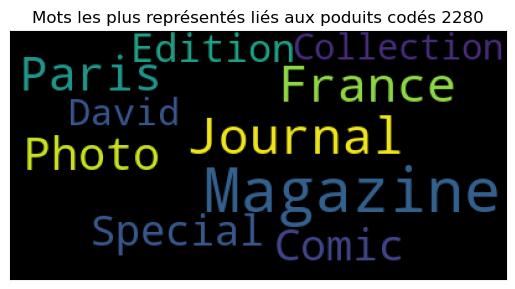

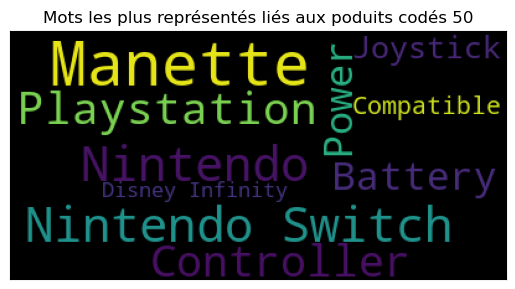

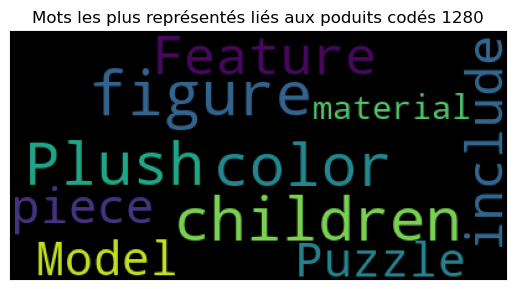

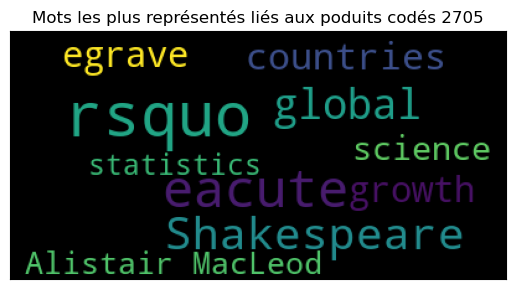

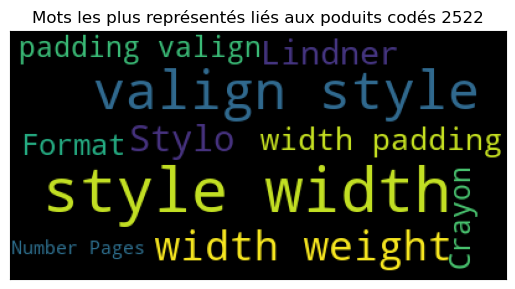

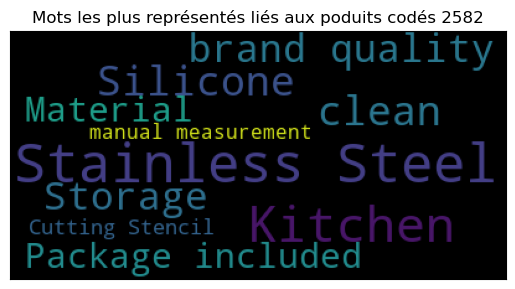

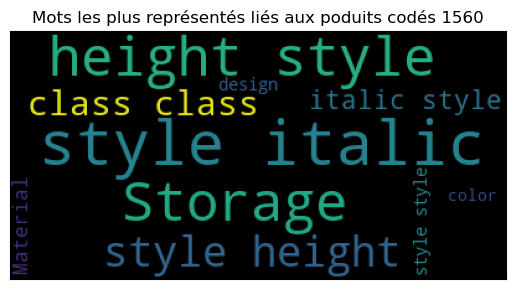

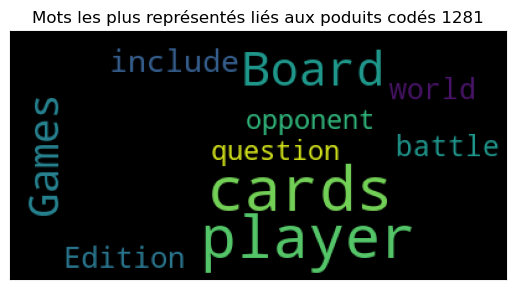

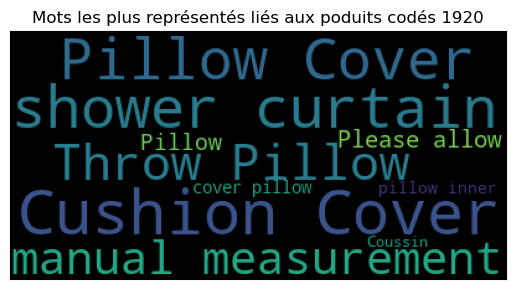

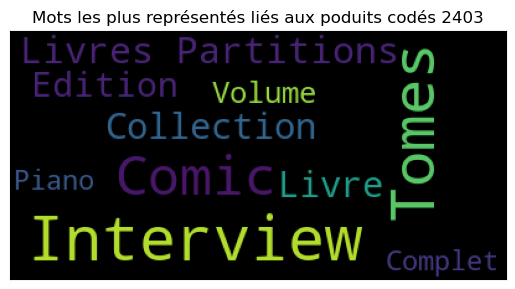

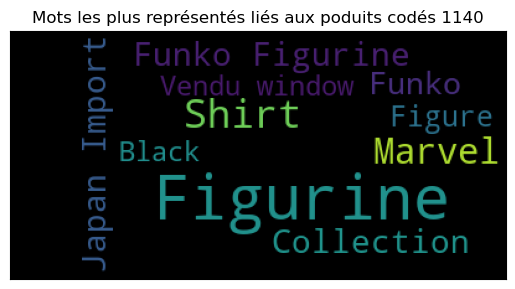

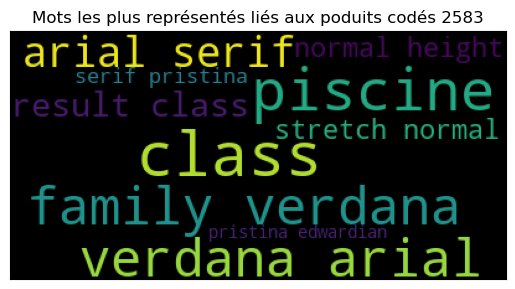

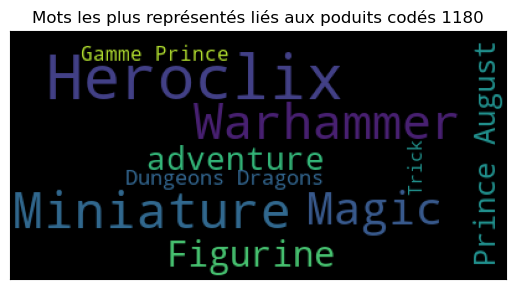

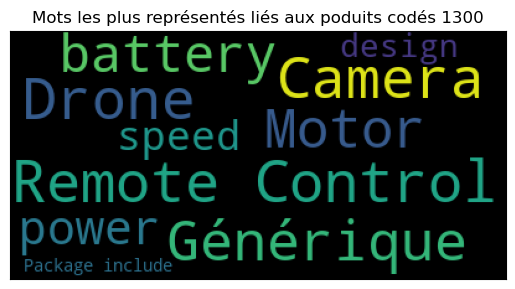

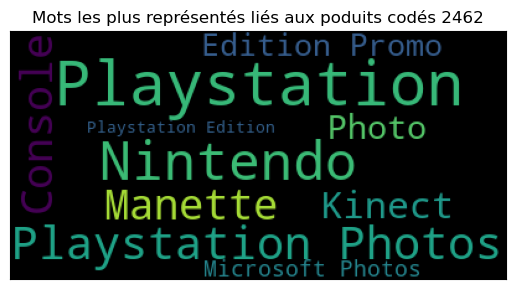

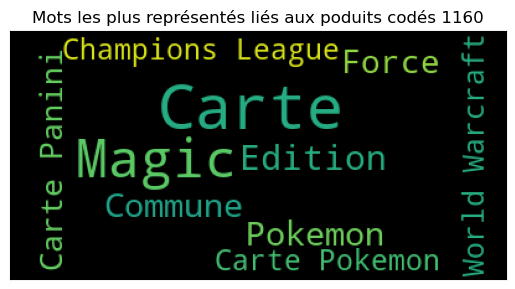

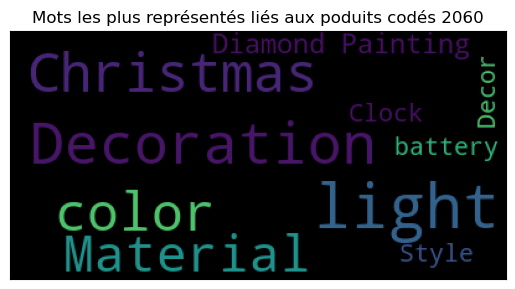

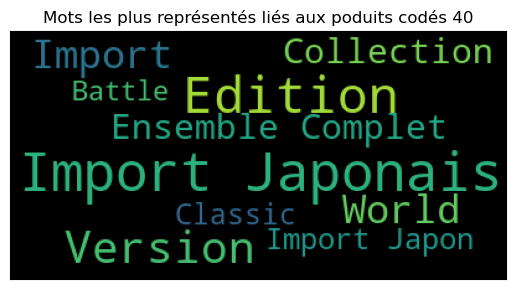

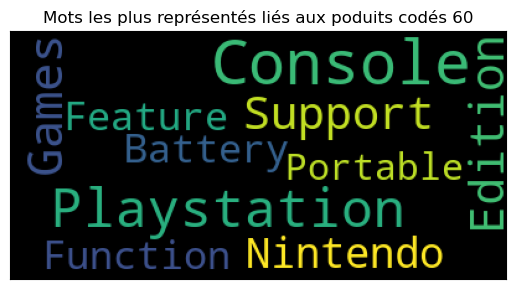

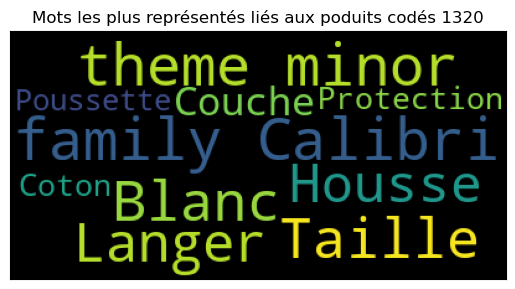

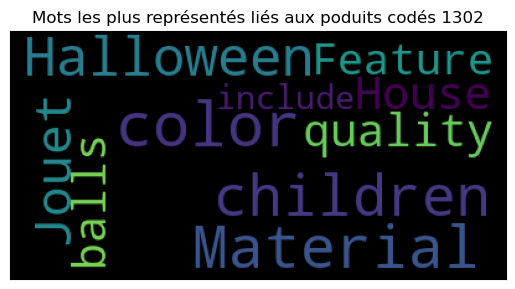

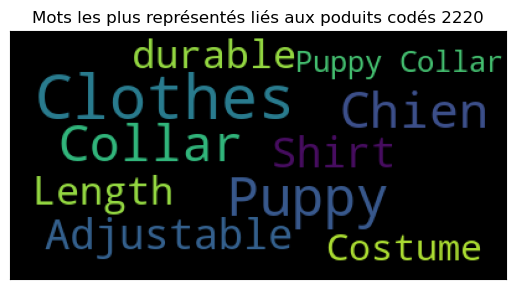

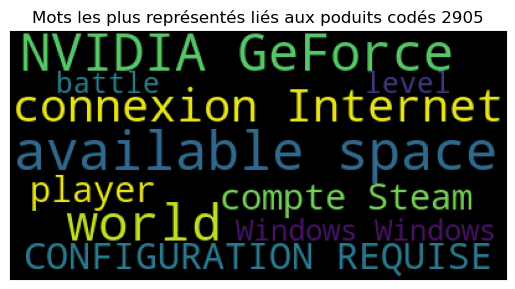

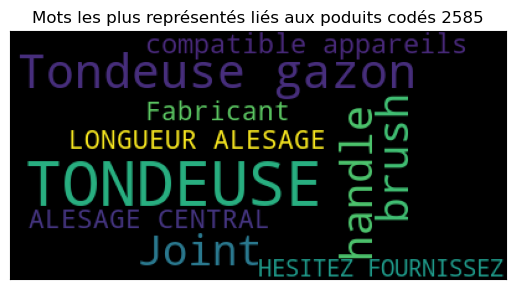

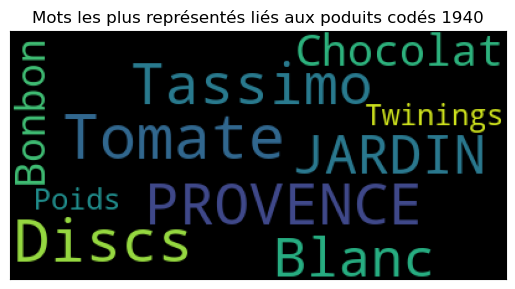

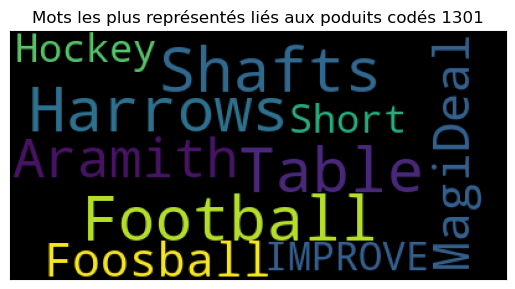

In [17]:
for cible in target_list:
    wordcloud(df_en, cible, "english")